In [12]:
# setup data
import numpy as np
import matplotlib.pyplot as plt

raw_wine_data = np.loadtxt('wine.data',delimiter=',')
np.shape(raw_wine_data)

(178, 14)

In [13]:
# shuffle radomize rows since they were sorted by labels
np.random.shuffle(raw_wine_data)

# separate data
labels = raw_wine_data[:,0]
labels = labels.astype(int)
data = raw_wine_data[:,1:14]
print(np.shape(labels))
print(np.shape(data))


(178,)
(178, 13)


Question 9 Part A

In [14]:
# create distance function

def eucl_dist(x, y):
    return np.sum(np.square(x - y)) ** 0.5

def NN1_classifier(x, train_data, train_label):
    distances = [eucl_dist(x, train_data[i]) for i in range(len(train_label))]
    index = np.argmin(distances)
    return train_label[index]

In [15]:
# find accuracy and confusion matrix using LOOCV
matrix = np.zeros((3, 3))
num_wrong = 0
for x in range(len(labels)):
    # need to delete self datapoint
    train_data = np.delete(data, x, axis=0)
    train_label = np.delete(labels, x, axis=0)

    real = labels[x]
    guess = NN1_classifier(data[x], train_data, train_label)
    matrix[real-1][guess-1] += 1 # -1 becauselabels are 1-3 instead of 0-2
    if real != guess:
        num_wrong +=1
print('error rate: ' + str(num_wrong / len(labels)))
print('accuracy: ' + str(1-(num_wrong / len(labels))))
print('Confusion Matrix:')
print(matrix)
print('rows are currect labels 1, 2, 3 from top to bottom')
print('columns are estimated labels 1, 2, 3 from left to right')

error rate: 0.2303370786516854
accuracy: 0.7696629213483146
Confusion Matrix:
[[52.  3.  4.]
 [ 5. 54. 12.]
 [ 3. 14. 31.]]
rows are currect labels 1, 2, 3 from top to bottom
columns are estimated labels 1, 2, 3 from left to right


Question 9 Part B

In [16]:
k_fold_values = [5, 10 ,15, 20, 25, 30 ,35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
error_avgs = []
accuracy_avgs = []

# goes through different k values
for k in k_fold_values:
    size_s = 178 // k
    total_error = 0

    # goes through each smaller training piece
    for i in range(k):

        # create the smaller training piece
        s_data = data[i*size_s : i*size_s+size_s]
        s_label = labels[i*size_s : i*size_s+size_s]
        train_data = np.delete(data, slice(i*size_s , i*size_s+size_s), axis=0)
        train_label = np.delete(labels, slice(i*size_s , i*size_s+size_s), axis=0)

        # does the classification
        num_wrong = 0
        for j in range(len(s_label)):
            real = s_label[j]
            guess = NN1_classifier(s_data, train_data, train_label)
            if real != guess:
                num_wrong += 1
        total_error += (num_wrong / len(s_label))

    error_avgs.append(total_error / k)
    accuracy_avgs.append(1-(total_error / k))



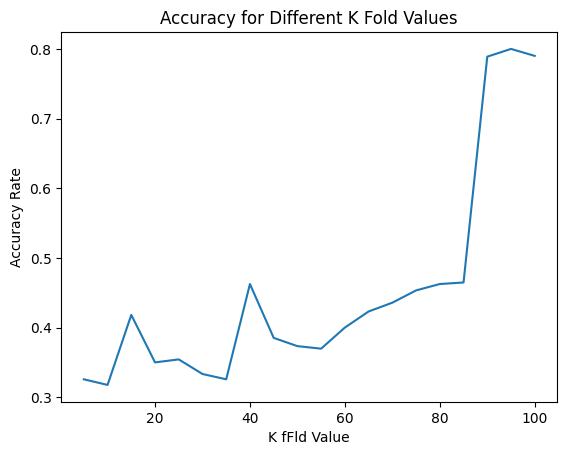

In [17]:
x_points = np.array(k_fold_values)
y_points = np.array(accuracy_avgs)
plt.plot(x_points, y_points)
plt.title('Accuracy for Different K Fold Values')
plt.xlabel("K fFld Value")
plt.ylabel("Accuracy Rate")
plt.show()

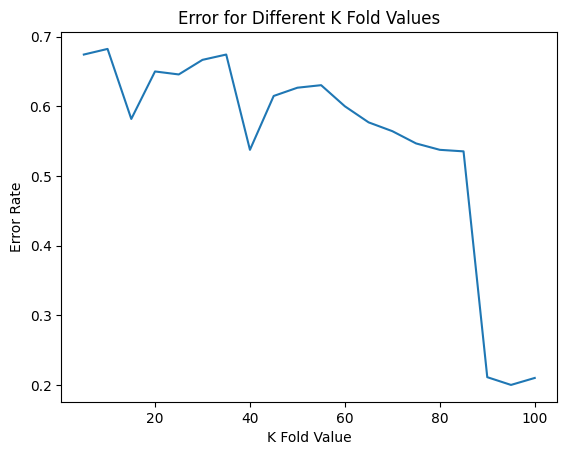

In [18]:
x_points = np.array(k_fold_values)
y_points = np.array(error_avgs)
plt.plot(x_points, y_points)
plt.title('Error for Different K Fold Values')
plt.xlabel("K Fold Value")
plt.ylabel("Error Rate")
plt.show()

Question 9 Part C

In [19]:
# noramlize data
norm_data = data
for x in range(len(norm_data)):
    max = np.amax(norm_data[x])
    norm_data[x] /= max

# find accuracy and confusion matrix using LOOCV
matrix = np.zeros((3, 3))
num_wrong = 0
for x in range(len(labels)):
    # need to delete self datapoint
    train_data = np.delete(norm_data, x, axis=0)
    train_label = np.delete(labels, x, axis=0)

    real = labels[x]
    guess = NN1_classifier(norm_data[x], train_data, train_label)
    matrix[real-1][guess-1] += 1 # -1 becauselabels are 1-3 instead of 0-2
    if real != guess:
        num_wrong +=1
print('error rate: ' + str(num_wrong / len(labels)))
print('accuracy: ' + str(1-(num_wrong / len(labels))))
print('Confusion Matrix:')
print(matrix)
print('rows are currect labels 1, 2, 3 from top to bottom')
print('columns are estimated labels 1, 2, 3 from left to right')

error rate: 0.15730337078651685
accuracy: 0.8426966292134832
Confusion Matrix:
[[52.  6.  1.]
 [ 5. 56. 10.]
 [ 2.  4. 42.]]
rows are currect labels 1, 2, 3 from top to bottom
columns are estimated labels 1, 2, 3 from left to right


Normalizing the data set did improve the performance since the accuacy went up.